# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2021

## Homework 8
Due Wednesday, March 31

In [1]:
using LinearAlgebra, PyPlot   # Packages needed

### Problem 1 - Cubic splines

Consider the interpolation of $n+1$ data points $(x_i,y_i)$, $i=0,\ldots,n$. A *cubic spline function* $S(x)$ is a piecewise cubic polynomial, that is, if $x_j\le x\le x_{j+1}$ then $S(x) = S_j(x)$ where

$$
\begin{align*}
S_j(x) = y_j + b_j(x-x_j)+c_j(x-x_j)^2+d_j(x-x_j)^3
\end{align*}
$$

The coefficients $b_j,c_j,d_j$, $j=0,\ldots,n-1$, are chosen such that the function is smooth and interpolates the given data.

#### Problem 1(a)

Write a function with the syntax `b,c,d = cubic_spline(x,y)`, which takes input data as vectors $\boldsymbol{x},\boldsymbol{y}$ and solves for the coefficient vectors $\boldsymbol{b},\boldsymbol{c},\boldsymbol{d}$ as described below. Create the matrix as a 
`Tridiagonal` matrix type in Julia, with the command `Tridiagonal(dl, d, du)` for lower-diagonal
`dl`, diagonal `d`, and upper-diagonal `du`.

Set $h_j=x_{j+1}-x_j$, $j=0,\ldots,n-1$, and solve the following linear system $A\boldsymbol{c}=\boldsymbol{f}$:

$$
\begin{align*}
A &=
\begin{pmatrix}
1 & 0 \\
h_0 & 2(h_0+h_1) & h_1 \\
    & \ddots & \ddots & \ddots \\
    &  & h_{n-2} & 2(h_{n-2}+h_{n-1}) & h_{n-1} \\
    &  &         & 0 & 1
\end{pmatrix} \\
\boldsymbol{f}&=(0,3(y_2-y_1)/h_1-3(y_1-y_0)/h_0,\ldots, \\
      &\ \ \ \ \ \ \ \ \ 3(y_n-y_{n-1})/h_{n-1}-3(y_{n-1}-y_{n-2})/h_{n-2},0)^T \\
\boldsymbol{c}&=(c_0,\ldots,c_n)^T
\end{align*}
$$

Finally, compute the vectors $\boldsymbol{b},\boldsymbol{d}$ as

$$
\begin{align*}
b_j &= (y_{j+1}-y_j)/h_j-h_j(2c_j+c_{j+1})/3 \\
d_j &= (c_{j+1}-c_j)/(3h_j)
\end{align*}
$$

where $j=0,\ldots,n-1$.

In [2]:
function cubic_spline(x,y)
    
    # length of x or y
    n = length(x)
    h = x[2:n] .- x[1:(n-1)] # vector h
    
    #lower diagonal vector in A
    dl = h[1:length(h)-1] 
    dl = [dl; 0] 
    
    #upper diagonal vector in A
    du = [0; h[2:length(h)]] 
    
    mid = 2*(h[2:length(h)] .+ h[1:length(h)-1]) 
    d = [1; mid; 1] #diagonal vector in A
    
    A = Tridiagonal(dl, d, du) # tridigonal matrix A
    
    # to compute the given values for elements of f
    diff(a,b,c,hi,hj) = return Float64(3*(a-b)/hi - 3*(b-c)/hj) 
    
    f = Float64[]
    f = [0; [diff(y[i+2],y[i+1],y[i],h[i+1],h[i]) for i = 1:length(y)-2]; 0]

    c = A \ (f)  # solve for vector c 

    # function to compute the values of vector b
    b(y1,y0,c1,c0,hj) = return Float64(((y1-y0)/hj) - (hj*(2*c0 + c1)/3)) 
    blist = [b(y[i+1],y[i],c[i+1],c[i],h[i]) for i = 1:length(y)-1] #vector b
    
    # function to compute the values for vector d
    df(c1,c0,hj) = return Float64((c1-c0)/(3*hj))
    dlist = [df(c[i+1],c[i],h[i]) for i = 1:length(y)-1] #vector d
    
    return blist,c,dlist # return b,c,d
    
end

cubic_spline (generic function with 1 method)

#### Problem 1(b)

Write a function with the syntax `yy = spline_eval(x, y, b, c, d, xx)` which evaluates the spline defined by the data `x,y` and the computed coefficient vectors `b,c,d` at all the $x$-coordinates in `xx`.

In [3]:
function spline_eval(x, y, b, c, d, xx)
    
    # init a vector of same length as xx
    yy = zeros(length(xx)) 
    
    # iter through xx
    for i = 1:length(xx) 
        
        # iter through x
        for j = 1:length(x) - 1 
            
            # check if inequality passes
            if x[j] ≤ xx[i] ≤ x[j+1]  
                
                # compute the i'th value of yy and store it 
                yy[i] = y[j] + b[j]*(xx[i] - x[j]) + c[j]*(xx[i] - x[j])^2 + d[j]*(xx[i] - x[j])^3 
                
            end
        end
    end
    
    
    return yy #return yy
   
end

spline_eval (generic function with 1 method)


#### Problem 1(c)

Test your function by computing the spline interpolant of the function

$$
f(x) = e^{-x/2}\sin 2x
$$

at the interpolation points $(x_i, f(x_i))$, $i=0,\ldots, 10$.

Plot the original function and the spline interpolant on the interval $0\le x \le 10$. Also plot markers at the interpolation points.

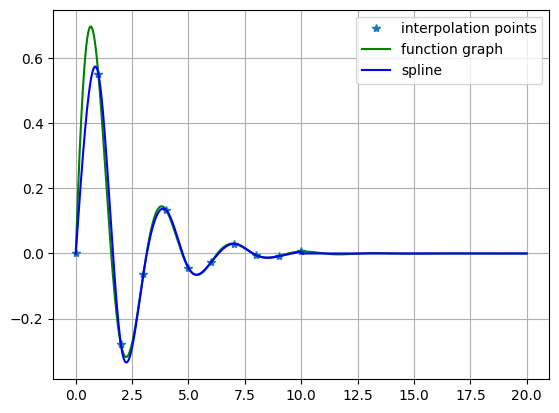

PyObject <matplotlib.legend.Legend object at 0x7f91d10ef970>

In [4]:
f(x) = return exp(-x/2)*sin(2x); #function to be interpolated
x = collect(0:10); # x interpolation points
y = f.(x) # y interpolation points
xx =  collect(0:.005:20); # inputs
b,c,d = cubic_spline(x,y); # coefficients for the cubic spline
yy = spline_eval(x, y, b, c, d, xx) # ouput of the evaluated spline

using PyPlot
plot(x,y,"*")
plot(xx,f.(xx),"g")
plot(xx,yy,"b")
grid(true)
legend(("interpolation points", "function graph", "spline"))

# Problem 2 - Parametric Spline Curves

To interpolate a set of data points using a *parametric spline curve*, we compute two piecewise cubic
polynomials $x(t)$ and $y(t)$, where $t$ is a parameter along the curve. For simplicity, we will let $t_i = i$ for the $n+1$ data points $(x_i,y_i)$, $i=0,\ldots,n$, interpolated such that $x(t_i)=x_i$, $y(t_i)=y_i$.

#### Problem 2(a) - Plotting a parametric spline curve

Write a function with the syntax
```julia
function plot_parametric_spline(x,y; r=10)
```
which computes and plots a parametric spline for the points in the vectors `x,y`.

For the plotting, draw straight lines between the spline points $x(t),y(t)$ for $3r+1$ equally spaced values of $t$ between $0$ and $n$.

Draw the splines in blue, with a line-width of 0.5. Also set `axis` to `equal`.

In [5]:
using PyPlot

function plot_parametric_spline(x,y; r=10)
    
    n = length(x) - 1 # length of x
    
    t = collect(0:n) # time input for parametric equations
    t = reshape(t,(1,n+1)) 
    
    steps = n/(3r+1) # the step amount for xx
    
    x = reshape(x,(1,length(x)))
    y = reshape(y,(1,length(y)))
        
    xx = collect(range(0, step = steps, stop = n)) # inputs
    
    b1,c1,d1 = cubic_spline(t, x) # coefficients for spline of x(t)
    b2,c2,d2 = cubic_spline(t, y) # coefficients for spline of y(t)
    
    yyx = spline_eval(t, x, b1, c1, d1, xx) # evalued spline for x(t)
    yyy = spline_eval(t, y, b2, c2, d2, xx) # evalued spline for y(t)


    plot(yyx,yyy,color="b",linewidth=0.5) # plot the parametric spline
    axis("equal")
        
end

plot_parametric_spline (generic function with 1 method)

Test the function using the code below.

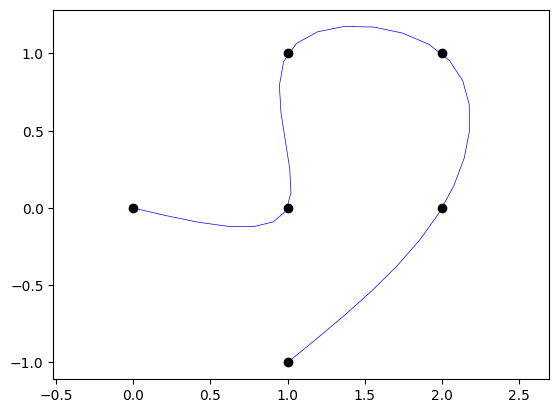

In [6]:
xy = [0 0; 1 0; 1 1; 2 1; 2 0; 1 -1]
plot_parametric_spline(xy[:,1], xy[:,2])
plot(xy[:,1], xy[:,2], "ko");

#### Problem 2(b) - Reading spline curves from a file

Download the file [`bmw.dat`](https://raw.githubusercontent.com/popersson/math124files/main/homework/bmw.dat), and upload it to the same directory as your Julia notebook.

The file contains the coordinates for a number of splines, with each spline in the following format:

$N_k$ <br>
$x_1$ $y_1$ <br>
$x_2$ $y_2$ <br>
$\ldots$ <br>
$x_{N_k}$ $y_{N_k}$


This is repeated until the file ends (which can be detected using the `eof` function). It is recommended to open the file and look at some of the lines, to make sure you know exactly how it is formatted.

Write a function

```julia
function read_splines(fname)
```

which opens a file `fname` containing splines as described above, and returns an array where the $k$-th element is an $N_k$-by-$2$
matrix with the $x,y$-points for each spline (note that $N_k$ is in general different for each spline).

*Hints*: This is probably easiest to do using strings and the `readline` function. To convert a string `str` to an integer, use `parse(Int64, str)`. To convert two numbers in the string to a vector of two floats, use `parse.(Float64, split(str))`.

In [7]:
function read_splines(fname)
    
    arr = Any[] # to store the array of arrays
    
    stream = open(fname) # start stream
   
    while !eof(stream) # continue untill end
        
        str = readline(stream) # read each line
        
        # check to see if its integer indicating its size of matrix
        if !occursin(".",str)
            
            global elem = Any[] # create array of size N_k
            push!(arr,elem) # add it to the array of arrays
            
        else # else if its not integer values, then its inputs for the matrix
           
            stri = parse.(Float64, split(str)) # add those values to the matrix
            push!(elem,stri)
            
        end
        
    end
    
    close(stream) # end stream
    
    return arr # return array of arrays
    
end

read_splines (generic function with 1 method)

Test your function by reading the file `bmw.dat`:

In [8]:
splines = read_splines("bmw.dat");

#### Problem 2(c) - Plotting an entire spline geometry

Write a function

```julia
function plot_splines(splines)
```

which plots all the parametric spline curves in `splines` (an array like the one returned by `read_splines`).

In [9]:
function plot_splines(splines)
    
    # reach each matrix in the inputs
    # separate the x and y data
    # then for each we evaluate the parametric splines 
    # and lastly we plot it
    
    for matrix in splines
        
       x = first.(matrix)
       y = last.(matrix)
       plot_parametric_spline(x, y)
    
    end
    
    
end

plot_splines (generic function with 1 method)

Plot the car twice using the commands below:

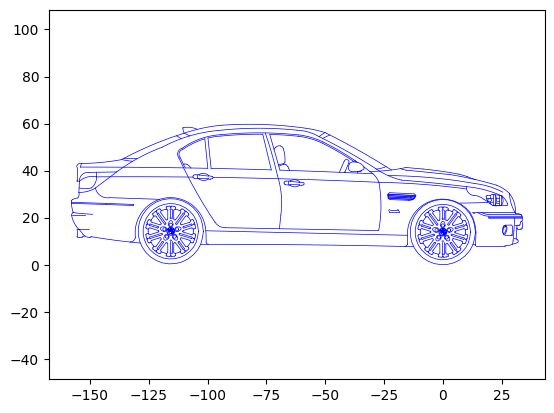

In [10]:
plot_splines(splines)

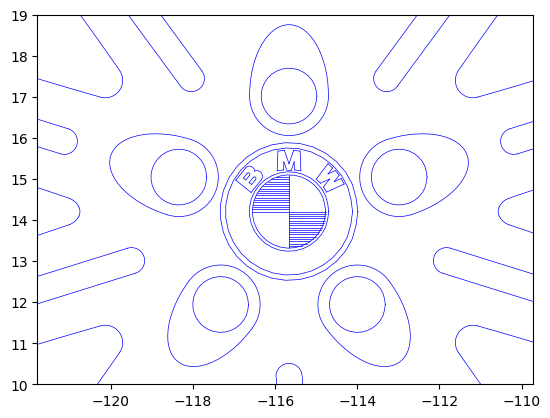

In [11]:
plot_splines(splines);
axis([-121,-110.5,10,19]);